In [110]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.utils import to_categorical

In [111]:
data = pd.read_csv('/content/drive/MyDrive/2024_DP/abalone.csv')

In [112]:
df_train, df_test = train_test_split(data, test_size=0.2, random_state=42)
print(df_train.shape)
print(df_test.shape)

(3341, 10)
(836, 10)


In [113]:
df_train.head()

,id,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
4038,4038,I,0.550,0.445,0.125,0.6720,0.2880,0.1365,0.210,11
1272,1272,I,0.475,0.355,0.100,0.5035,0.2535,0.0910,0.140,8
3384,3384,F,0.305,0.225,0.070,0.1485,0.0585,0.0335,0.045,7
3160,3160,I,0.275,0.200,0.065,0.1165,0.0565,0.0130,0.035,7
3894,3894,M,0.495,0.380,0.135,0.6295,0.2630,0.1425,0.215,12


In [114]:
df_train.describe()

,id,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
count,3341.000000,3341.000000,3341.000000,3341.000000,3341.000000,3341.000000,3341.000000,3341.000000,3341.000000
mean,2116.754565,0.524964,0.408518,0.139790,0.830838,0.360561,0.180832,0.239682,9.944627
std,1202.682792,0.119137,0.098687,0.042514,0.491583,0.223018,0.109444,0.139941,3.207344
min,0.000000,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,1078.000000,0.450000,0.350000,0.115000,0.443000,0.186500,0.093000,0.130000,8.000000
50%,2121.000000,0.545000,0.425000,0.140000,0.802000,0.337000,0.171000,0.234000,9.000000
75%,3163.000000,0.615000,0.480000,0.165000,1.151000,0.503500,0.253500,0.328500,11.000000
max,4175.000000,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [115]:
df_train.columns

Index(['id', 'Sex', 'Length', 'Diameter', 'Height', 'Whole_weight',
       'Shucked_weight', 'Viscera_weight', 'Shell_weight', 'Rings'],
      dtype='object')

In [116]:
num_cols=['Length','Diameter','Height',"Whole weight Ratio"]

In [117]:
def getFeats(dfs):

    dfs["Whole weight Ratio"]=dfs["Shucked_weight"]/dfs["Whole_weight"]
    dfs["Shell_weight"]=np.log(0.00001+dfs["Shell_weight"])
    dfs["Whole_weight"]=np.log(0.00001+dfs["Whole_weight"])
    dfs["Shucked_weight"]=np.log(0.00001+dfs["Shucked_weight"])
    dfs["Viscera_weight"]=np.log(0.00001+dfs["Viscera_weight"])

    sex_dict={'I':0,'M':1,'F':2}
    dfs['Sex']=dfs['Sex'].map(sex_dict)

    scaler = StandardScaler()
    dfs[num_cols] = scaler.fit_transform(dfs[num_cols])

    return dfs

In [118]:
df_train['typ']=0
df_test['typ']=1
#
df_all=pd.concat([df_train,df_test],axis=0)
df_all=getFeats(df_all)
df_all.head()

,id,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings,typ,Whole weight Ratio
4038,4038,0,0.216591,0.374075,-0.347099,-0.397482,-1.244760,-1.991357,-1.560600,11,0,-0.036338
1272,1272,0,-0.408000,-0.532927,-0.944870,-0.686152,-1.372352,-2.396786,-1.966041,8,0,0.671962
3384,3384,2,-1.823741,-1.843041,-1.662195,-1.907103,-2.838558,-3.395911,-3.100871,7,0,-0.363821
3160,3160,0,-2.073577,-2.094986,-1.781749,-2.149778,-2.873338,-4.342037,-3.352122,7,0,0.497052
3894,3894,1,-0.241443,-0.280982,-0.107991,-0.462814,-1.335563,-1.948343,-1.537071,12,0,-0.138270


In [119]:
df_all['Rings'].value_counts()

,count
Rings,
9,689
10,634
8,568
11,487
7,391
12,267
6,259
13,203
14,126


In [120]:
from sklearn.preprocessing import LabelEncoder

# LabelEncoder를 사용하여 숫자로 인코딩
label_encoder = LabelEncoder()
df_all['Rings'] = label_encoder.fit_transform(df_all['Rings'])

In [121]:
df_all['Rings'].value_counts()

,count
Rings,
8,689
9,634
7,568
10,487
6,391
11,267
5,259
12,203
13,126


In [203]:
# 필요한 라이브러리 임포트
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

# 데이터 준비
df_train = df_all[df_all['typ'] == 0]
df_test = df_all[df_all['typ'] == 1]

# 피처와 타겟 설정
X_train = df_train.drop(['id', 'Rings', 'typ'], axis=1).values
y_train = df_train['Rings'].values
X_test = df_test.drop(['id', 'Rings', 'typ'], axis=1).values
y_test = df_test['Rings'].values

num_classes = len(np.unique(y_train))  # 클래스의 개수에 맞게 설정
y_train = to_categorical(y_train, num_classes=num_classes)
y_test = to_categorical(y_test, num_classes=num_classes)



In [204]:
X_train.shape

(3341, 9)

In [165]:
y_train.shape

(3341, 28)

In [205]:
X_test.shape

(836, 9)

In [199]:
y_test.shape

(836, 28)

In [206]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, Flatten, Dropout
from tensorflow.keras.optimizers import Adam

In [207]:
# 입력 데이터를 9x1 크기로 변환
X_train = X_train.reshape(-1, 3, 3, 1)  # (batch_size, height, width, channels)
X_test = X_test.reshape(-1, 3, 3, 1)

# CNN 모델 구축
model = Sequential()

# Conv2D 층
model.add(Conv2D(32, kernel_size=(2, 2), activation='relu', input_shape=(3, 3, 1)))
model.add(Conv2D(64, kernel_size=(2, 2), activation='relu'))
model.add(Flatten())

# 완전 연결층
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

# 모델 컴파일
model.compile(Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# 모델 요약 출력
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_58"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_62 (Conv2D)                   │ (None, 2, 2, 32)            │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_63 (Conv2D)                   │ (None, 1, 1, 64)            │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_33 (Flatten)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_94 (Dense)                     │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_17 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_95 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_96 (Dense)                     │ (None, 28)                  │           1,820 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 26,812 (104.73 KB)

 Trainable params: 26,812 (104.73 KB)

 Non-trainable params: 0 (0.00 B)

In [209]:
model_history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_test, y_test))
y_pred = model.predict(X_test)
# 모델 평가
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy:.4f}")

Epoch 1/30
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.2835 - loss: 1.8978 - val_accuracy: 0.2787 - val_loss: 2.0691
Epoch 2/30
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.2927 - loss: 1.8818 - val_accuracy: 0.2835 - val_loss: 2.0631
Epoch 3/30
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.3016 - loss: 1.8914 - val_accuracy: 0.2835 - val_loss: 2.0398
Epoch 4/30
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.2870 - loss: 1.8741 - val_accuracy: 0.2847 - val_loss: 2.0804
Epoch 5/30
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3045 - loss: 1.8467 - val_accuracy: 0.2943 - val_loss: 2.0801
Epoch 6/30
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2855 - loss: 1.8861 - val_accuracy: 0.3110 - val_loss: 2.0707
Epoch 7/30
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.2945 - loss: 1.8640 - val_accuracy: 0.2823 - val_loss: 2.1154
Epoch 8/30
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2874 - loss: 1.8711 - val_accuracy: 0.

In [210]:
y_test_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

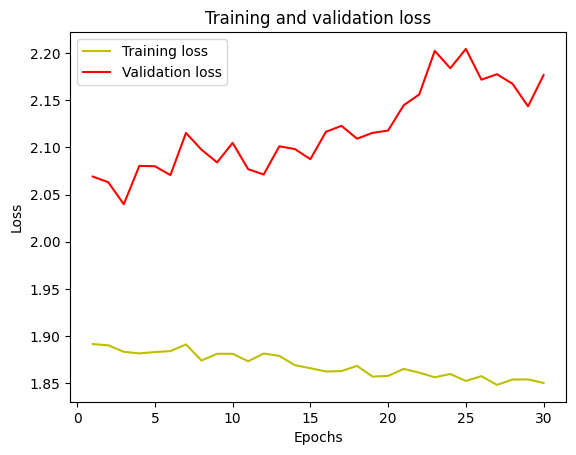

In [211]:
import matplotlib.pyplot as plt
import seaborn as sns

loss = model_history.history['loss']
val_loss =model_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

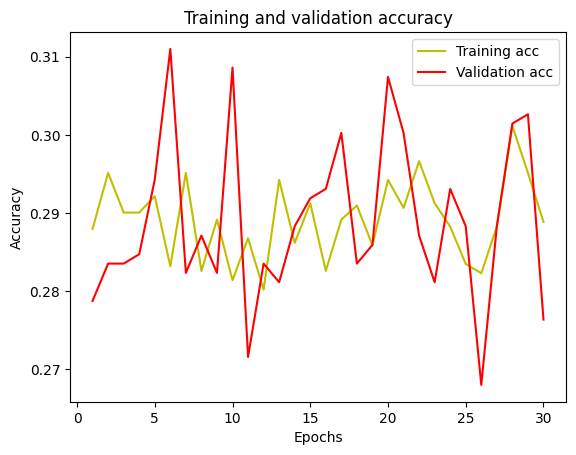

In [212]:
acc =model_history.history['accuracy']
val_acc =model_history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [213]:
#Accuracy of the predicted values
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           2       0.00      0.00      0.00         3
           3       0.38      0.77      0.51        13
           4       0.36      0.16      0.22        32
           5       0.27      0.12      0.17        48
           6       0.37      0.55      0.44        84
           7       0.41      0.37      0.39        99
           8       0.34      0.39      0.36       142
           9       0.25      0.10      0.14       139
          10       0.21      0.51      0.30        93
          11       0.25      0.02      0.04        51
          12       0.08      0.26      0.12        31
          13       0.00      0.00      0.00        26
          14       0.00      0.00      0.00        21
          15       0.67      0.15      0.25        13
          16       0.00      0.00      0.00         8
          17       0.00      0.00      0.00        12
          18       0.00      0.00      0.00         7
          19       0.00    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [216]:
model.save('/content/drive/MyDrive/2024-deeplearning/data/cnn_model.h5')

In [260]:
from tensorflow.keras.models import load_model

base_model = load_model('/content/drive/MyDrive/2024-deeplearning/data/cnn_model.h5')



In [221]:
print("Number of layers in the base model: ", len(base_model.layers))

Number of layers in the base model:  7


In [222]:
base_model.trainable = False

In [265]:
import tensorflow as tf
from tensorflow.keras import layers, models


# 모델의 마지막 레이어 1개를 삭제하는 함수
def remove_last_layers(model, num_layers_to_remove):
    model_layers = model.layers[:-num_layers_to_remove]  # 마지막 레이어부터 지정된 갯수만큼 제외
    new_model = models.Sequential()

    # Sequential 모델에 기존의 레이어들을 하나씩 추가
    for i, layer in enumerate(model_layers):
        # 첫 번째 레이어에 input_shape 명시
        if i == 0:
            new_model.add(layers.InputLayer(input_shape=model.input_shape[1:]))
        new_model.add(layer)

    return new_model

# 마지막 층 1개를 삭제
new_model = remove_last_layers(base_model, 1)

# 모델 요약 출력 (삭제 후)
print("After removing last layer:")
new_model.summary()

# 새로운 층 추가
new_model.add(layers.Dense(256, activation='relu'))  # 새로운 완전 연결층 추가
new_model.add(layers.Dropout(0.5))  # 드롭아웃 추가
new_model.add(layers.Dense(num_classes, activation='softmax'))

# 모델 요약 출력 (새 층 추가 후)
print("\nAfter adding new layers:")
new_model.summary()

# 모델 컴파일
new_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


After removing last layer:


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential_78"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_62 (Conv2D)                   │ (None, 2, 2, 32)            │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_63 (Conv2D)                   │ (None, 1, 1, 64)            │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_33 (Flatten)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_94 (Dense)                     │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_17 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_95 (Dense)                     │ (None, 64)                  │           8,256 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 24,992 (97.62 KB)

 Trainable params: 24,992 (97.62 KB)

 Non-trainable params: 0 (0.00 B)


After adding new layers:


Model: "sequential_78"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_62 (Conv2D)                   │ (None, 2, 2, 32)            │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_63 (Conv2D)                   │ (None, 1, 1, 64)            │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_33 (Flatten)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_94 (Dense)                     │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_17 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_95 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_116 (Dense)                    │ (None, 256)                 │          16,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_20 (Dropout)                 │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_117 (Dense)                    │ (None, 28)                  │           7,196 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 48,828 (190.73 KB)

 Trainable params: 48,828 (190.73 KB)

 Non-trainable params: 0 (0.00 B)

In [266]:
model_history = new_model.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_test, y_test))
y_pred = new_model.predict(X_test)
# 모델 평가
test_loss, test_accuracy = new_model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy:.4f}")

Epoch 1/30
105/105 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.1812 - loss: 2.6018 - val_accuracy: 0.2823 - val_loss: 2.0979
Epoch 2/30
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.2481 - loss: 2.0672 - val_accuracy: 0.2620 - val_loss: 2.1028
Epoch 3/30
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.2571 - loss: 1.9951 - val_accuracy: 0.2727 - val_loss: 2.0625
Epoch 4/30
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.2870 - loss: 1.9414 - val_accuracy: 0.3002 - val_loss: 2.0614
Epoch 5/30
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.2769 - loss: 1.9314 - val_accuracy: 0.2895 - val_loss: 2.0507
Epoch 6/30
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.2637 - loss: 1.9543 - val_accuracy: 0.2990 - val_loss: 2.0836
Epoch 7/30
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2737 - loss: 1.9194 - val_accuracy: 0.2907 - val_loss: 2.1412
Epoch 8/30
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.2805 - loss: 1.9060 - val_accuracy: 0

In [267]:
base_model.trainable = True
for layer in base_model.layers[:-3]:
    layer.trainable = False
new_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [268]:
model_history = new_model.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_test, y_test))
y_pred = new_model.predict(X_test)
# 모델 평가
test_loss, test_accuracy = new_model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy:.4f}")

Epoch 1/30
105/105 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - accuracy: 0.2924 - loss: 1.8265 - val_accuracy: 0.2871 - val_loss: 2.1770
Epoch 2/30
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.2980 - loss: 1.8160 - val_accuracy: 0.2919 - val_loss: 2.2628
Epoch 3/30
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.2871 - loss: 1.8303 - val_accuracy: 0.2811 - val_loss: 2.2655
Epoch 4/30
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.2927 - loss: 1.8049 - val_accuracy: 0.2907 - val_loss: 2.2550
Epoch 5/30
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.2988 - loss: 1.8132 - val_accuracy: 0.2823 - val_loss: 2.2718
Epoch 6/30
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3052 - loss: 1.7994 - val_accuracy: 0.2907 - val_loss: 2.2909
Epoch 7/30
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.2997 - loss: 1.7966 - val_accuracy: 0.2955 - val_loss: 2.2676
Epoch 8/30
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2991 - loss: 1.8087 - val_accuracy: 0